# Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Assignment Steps:
    
    1. Reading and understanding data
    
    2. Data Cleaning
    - Removing Unwanted columns
    - Mapping Categorical Columns
    
    3. Data Visualization
    - Performing EDA and Understanding Variables
    - Checking Co-relation between variables
    
    4. Data Preparation
    - Creating Dummy Variables
    - Dividing Data into test-train
    - Performing Scaling(Min-Max)
    
    5. Data Modelling and Residual Analysis
    - Creating linear regression model using mixed approach
    - Check various assumptions
    - Report Final Model
    - Residual Analysis
    
    6. Prediction and Evaluation
    - Evaluate the model on the basis of test data
    - Conclusion

## Step-1 Reading and understanding data

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

In [2]:
# Ignore warnings
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')

In [3]:
# Reading dataset into a dataframe
df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

<b>Note</b>: 'cnt' is the target variable

In [5]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Stats of Numerical columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step-2 Data Cleaning

### Dropping"instant","dteday","casual" & "registered"

In [7]:
df.drop(["instant","dteday","casual","registered"], axis=1, inplace=True)

### Formatting "mnth","weekday","weathersit", "season" & "yr" for better interpretation

<b>Converting "weathersit" into respective categories:</b>
    - 1: Clear
    - 2: Cloudy
    - 3: Light Rain/Snow
    - 4: Heavy Rain/Snow

In [8]:
df['weathersit'].replace(1,'Clear',inplace=True)
df['weathersit'].replace(2,'Cloudy',inplace=True)
df['weathersit'].replace(3,'Light Rain/Snow',inplace=True)
df['weathersit'].replace(4,'Heavy Rain/Snow',inplace=True)

<b>Converting 'season' into respective categories:</b>
    - 1:spring
    - 2:summer
    - 3:fall
    - 4:winter

In [9]:
df['season'].replace(1,'spring',inplace=True)
df['season'].replace(2,'summer',inplace=True)
df['season'].replace(3,'fall',inplace=True)
df['season'].replace(4,'winter',inplace=True)

#### Converting "mnth", "weekday" & "yr"

In [10]:
# Converting 'mnth'
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

for i in range(12):
    df['mnth'].replace(i+1,months[i],inplace=True)

In [11]:
# Converting 'weekday'
weekday = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

for i in range(7):
    df['weekday'].replace(i,weekday[i],inplace=True)

In [12]:
# Converting 'yr'
df['yr'].replace(0,'2018',inplace=True)
df['yr'].replace(1,'2019',inplace=True)

## Step-3 Data Visualization

In [13]:
# Styling
plt.style.use('seaborn')

fontTitle = {'family': 'DejaVu Sans',
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 16,
        }

fontLabel = {'family': 'DejaVu Sans',
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 14,
        }

fontTick = {'family': 'DejaVu Sans',
        'weight': 'normal',
        'size': 12,
        }

### Visualizing Categorical columns

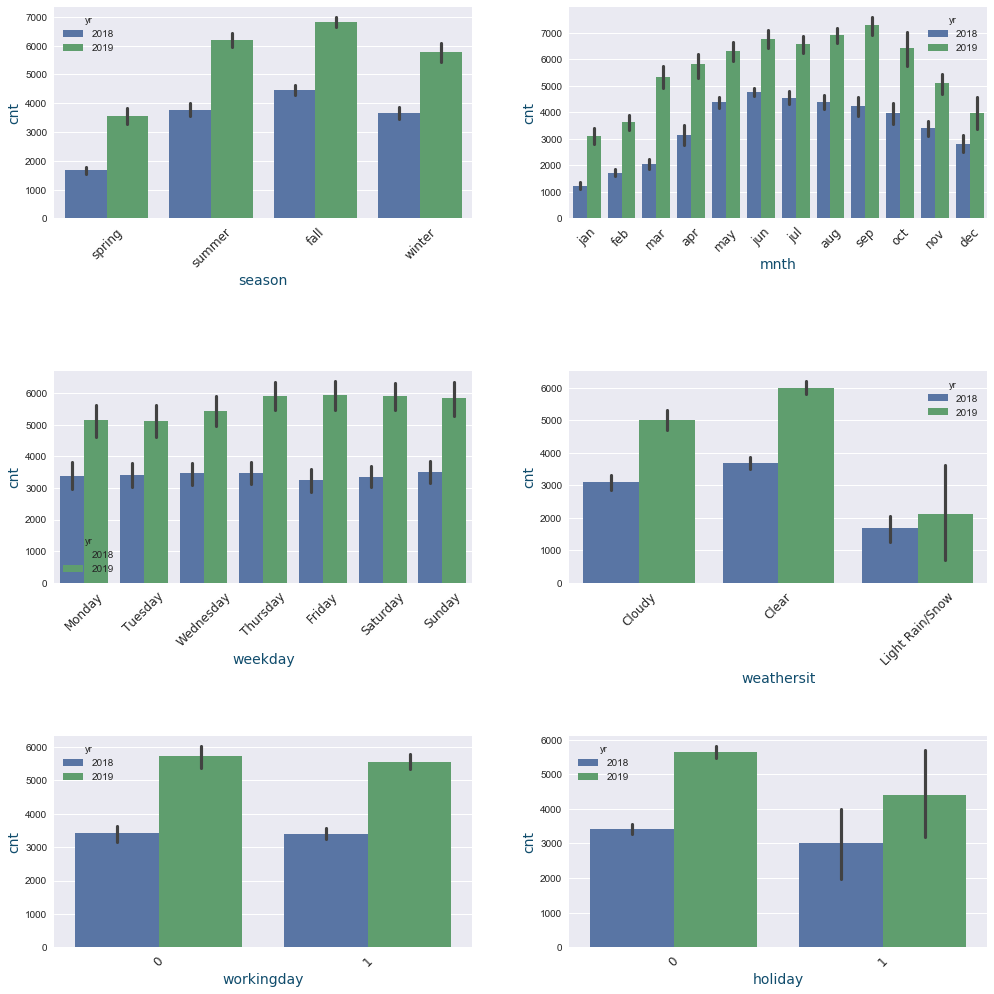

In [14]:
# Plotting Categorical columns on bar graph vs 'cnt'
cat = ['season','mnth','weekday','weathersit','workingday','holiday']

fig, ax = plt.subplots(3,2,figsize = (15,15))
i = 0

for x in range(3):
    ax[x,0].set_xlabel(ax[x,0].get_xticklabels(),fontdict=fontLabel)
    ax[x,0].set_ylabel(ax[x,0].get_yticklabels(),fontdict=fontLabel)
    sns.barplot(x=cat[i],y='cnt',data=df,hue='yr',ax=ax[x,0])
    ax[x,0].set_xticklabels(labels = ax[x,0].get_xticklabels() ,rotation=45,fontdict=fontTick)
    
    ax[x,1].set_xlabel(ax[x,1].get_xticklabels(),fontdict=fontLabel)
    ax[x,1].set_ylabel(ax[x,1].get_yticklabels(),fontdict=fontLabel)
    sns.barplot(x=cat[i+1],y='cnt',data=df,hue='yr',ax=ax[x,1])
    #sns.countplot(df[cat[i+1]],ax=ax[x,1])
    ax[x,1].set_xticklabels(labels = ax[x,1].get_xticklabels() ,rotation=45,fontdict=fontTick)
    
    fig.tight_layout(pad=5)
    i+=2

##### Inferences:
- Considerable increase in demand of bike sharing service was observed in 2019 compared to 2018.
- Demand of bike sharing service is usually high during summer and fall.
- Bikes are less likely to get rented when there is a holiday.
- Rental service is highly dependent on weather situation.

### Visualizing Numerical columns

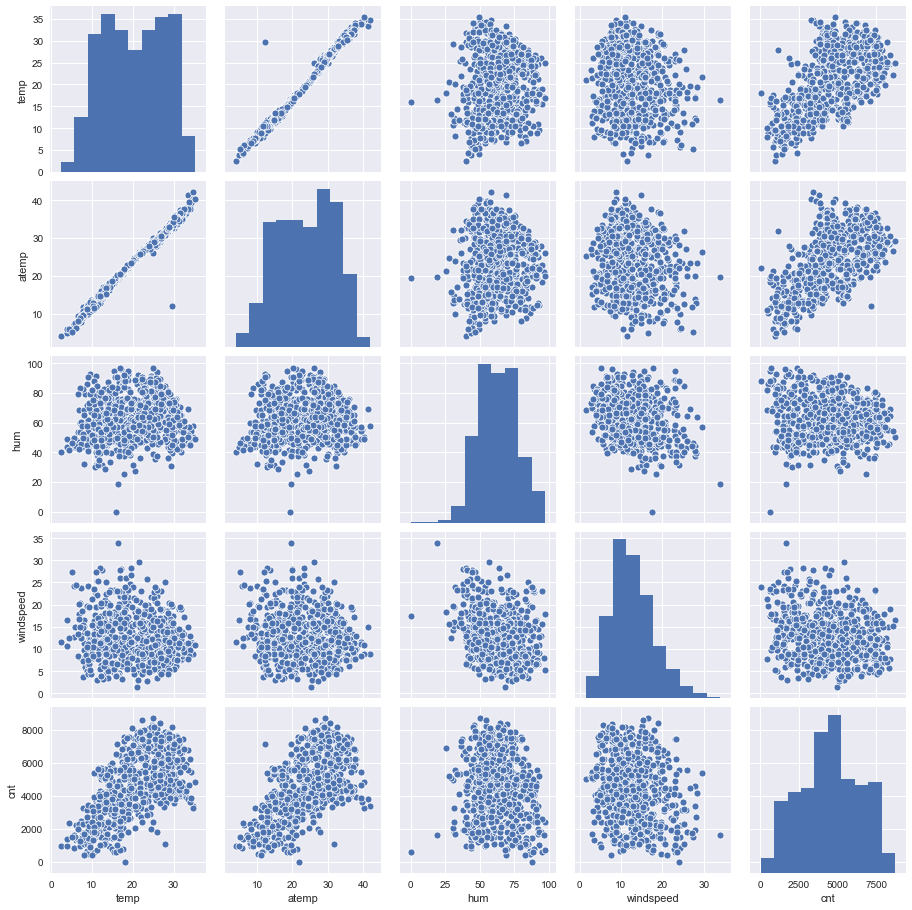

In [15]:
# Plotting scatter plot of numerical columns
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

##### Inferences:
- "temp" and "atemp" seems to show high Multicollinearity
- "cnt" is having linear correlation with "temp" and "atemp"

### Checking Co-relation between variables

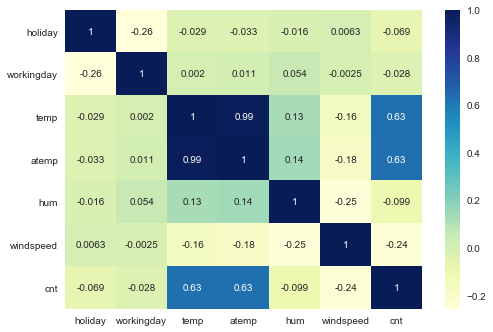

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

##### 'temp' and 'atemp' are are highly correlated, thus we can drop "atemp" to avoid multicollinearity.

In [17]:
# Dropping 'atemp'
df.drop('atemp',axis=1,inplace=True)

In [18]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,jan,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


## Step-4 Data Preparation

### Creating Dummy Variables for categorical columns

In [19]:
def dummy(df_input,col):
    '''
    Provided the dataframe and categorical column it creates dummy variable
    '''
    temp = pd.get_dummies(df_input[col], drop_first = True)
    df_new = pd.concat([df_input,temp],axis=1)
    df_new.drop(col,axis=1,inplace=True)
    return df_new

In [20]:
# Creating dummies for categorical columns
df = dummy(df,'season')
df = dummy(df,'yr')
df = dummy(df,'mnth')
df = dummy(df,'weekday')
df = dummy(df,'weathersit')

In [21]:
df.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Rain/Snow
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dividing Data into test-train split

In [22]:
# Dividing data into 70:30 train-test split
from sklearn.model_selection import train_test_split

y = df.pop('cnt')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [23]:
X_train.head()

,holiday,workingday,temp,hum,windspeed,spring,summer,winter,2019,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Rain/Snow
235,0,1,27.606653,60.5000,16.958236,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
524,0,0,29.144153,43.7083,9.667229,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
12,0,0,6.765000,47.0417,20.167000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
161,0,1,29.725000,65.4583,10.374950,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
556,0,1,29.383347,63.3333,10.166111,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Performing Min-Max Scaling on 'temp','hum' & 'windspeed'

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']

# Fit_transforming training data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [25]:
# Transfroming test data using Train min-max scaler
X_test[num_vars] = scaler.transform(X_test[num_vars])

## Step-5 Data Modelling and Evaluation

### Model Building

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Performing Recursive Feature Elemination (RFE)

In [27]:
# Performing RFE to select top 15 features
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('2019', True, 1),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', True, 1),
 ('mar', False, 14),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sep', False, 6),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 9),
 ('Wednesday', False, 10),
 ('Cloudy', False, 2),
 ('Light Rain/Snow', True, 1)]

In [29]:
# list of 15 features filtered using RFE
X_train.columns[rfe.support_]

Index(['holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', '2019',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'nov', 'Light Rain/Snow'],
      dtype='object')

In [30]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,holiday,temp,hum,windspeed,spring,winter,2019,aug,dec,feb,jan,jul,jun,nov,Light Rain/Snow
235,0,0.753859,0.488399,0.527988,0,0,0,1,0,0,0,0,0,0,0
524,0,0.802869,0.254640,0.255430,0,0,1,0,0,0,0,0,1,0,0
12,0,0.089497,0.301044,0.647940,1,0,0,0,0,0,1,0,0,0,0
161,0,0.821384,0.557424,0.281887,0,0,0,0,0,0,0,0,1,0,0
556,0,0.810494,0.527842,0.274080,0,0,1,0,0,0,0,1,0,0,0


### Finding best fit model using VIF/p-value

In [31]:
def build_model(X,y):
    '''
    Trains the statsmodel.api model using provided data
    '''
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y,X).fit() # Fitting the model
    print(lm.summary())    # Prints Model Summary
    
def checkVIF(X):
    '''
    Computes VIF for provided dataset
    '''
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### MODEL 1
- Training model using feature list obtained from RFE

In [32]:
build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     153.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.81e-175
Time:                        22:08:54   Log-Likelihood:                -4136.2
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     495   BIC:                             8372.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3146.4697    242.022     

In [33]:
checkVIF(X_train_rfe)

,Features,VIF
1,temp,15.57
2,hum,9.32
4,spring,4.21
3,windspeed,4.10
5,winter,2.89
10,jan,2.38
6,2019,2.08
9,feb,2.07
11,jul,1.89
13,nov,1.84


<b style="color:red;">Remark :</b>
VIF is high for "temp" & "humidity", but due to their significance in model building both are not dropped. As dropping either of them is impacting the R2_score by 4-6%.

In [34]:
# Dropping "feb" due to high p-value
X_train_new = X_train_rfe.drop(["feb"], axis = 1)

<b>Observations / Actions:</b>
- Even though VIF is high for "temp" & "humidity", due to its significance in model building both are not dropped.
- "feb" is dropped as its p-value is 0.041 (considering significance level as 0.02)

### MODEL 2
- Training model after dropping "feb"

In [35]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     163.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.81e-175
Time:                        22:08:56   Log-Likelihood:                -4138.3
No. Observations:                 511   AIC:                             8307.
Df Residuals:                     496   BIC:                             8370.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3068.4656    239.682     

In [36]:
# Dropping "jan" due to high p-value
X_train_new = X_train_new.drop(["jan"], axis = 1)

<b>Observations / Actions:</b>
- "jan" is dropped as its p-value is 0.237 (considering significance level as 0.02)

### MODEL-3
- Training model after dropping "jan"

In [37]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     175.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.18e-176
Time:                        22:08:57   Log-Likelihood:                -4139.0
No. Observations:                 511   AIC:                             8306.
Df Residuals:                     497   BIC:                             8365.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3002.0820    233.133     

In [38]:
# Dropping 'dec' due to high p-value
X_train_new = X_train_new.drop(["dec"], axis = 1)

<b>Observations / Actions:</b>
- "dec" is dropped as its p-value is 0.126 (considering significance level as 0.02)

### MODEL-4
- Training model after dropping "dec"

In [39]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     189.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          9.55e-177
Time:                        22:08:58   Log-Likelihood:                -4140.2
No. Observations:                 511   AIC:                             8306.
Df Residuals:                     498   BIC:                             8361.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2932.3687    228.963     

In [40]:
# Dropping 'nov' due to high p-value
X_train_new = X_train_new.drop(["nov"], axis = 1)

<b>Observations / Actions:</b>
- "nov" is dropped as its p-value is 0.087 (considering significance level as 0.02)

### Model-5 
- Training model after dropping "nov"

In [41]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     205.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.81e-177
Time:                        22:08:59   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8307.
Df Residuals:                     499   BIC:                             8358.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2863.2276    225.830     

In [42]:
# Dropping "winter" due to low coeff. Magnitude
X_train_new = X_train_new.drop(["winter"], axis = 1)

<b>Observations / Actions:</b>
- "winter" is dropped since its coeff. magnitude is very low.

### Model-6
- Training model after dropping "winter"

In [43]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          9.28e-177
Time:                        22:09:00   Log-Likelihood:                -4145.7
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     500   BIC:                             8360.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3185.3725    196.097     

In [44]:
# Dropping "holiday" due to low coeff. Magnitude
X_train_new = X_train_new.drop(["holiday"], axis = 1)

<b>Observations / Actions:</b>
- "holiday" is dropped since its coeff. magnitude is very low.

### Model-7
- Training model after dropping "holiday"

In [45]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.07e-176
Time:                        22:09:02   Log-Likelihood:                -4149.4
No. Observations:                 511   AIC:                             8319.
Df Residuals:                     501   BIC:                             8361.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3156.0754    197.008     

In [46]:
# Dropping "aug" due to low coeff. Magnitude
X_train_new = X_train_new.drop(["aug"], axis = 1)

<b>Observations / Actions:</b>
- "aug" is dropped since its coeff. magnitude is very low.

### Model-8
- Training model after dropping "aug"

In [47]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     262.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          9.24e-174
Time:                        22:09:03   Log-Likelihood:                -4158.5
No. Observations:                 511   AIC:                             8335.
Df Residuals:                     502   BIC:                             8373.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3276.7624    198.283     

In [48]:
# Dropping "jun" due to low coeff. Magnitude
X_train_new = X_train_new.drop(["jun"], axis = 1)

<b>Observations / Actions:</b>
- "jun" is dropped since its coeff. magnitude is very low.

### Model-9 (Final Model)
- Training model after dropping "jun"

In [49]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     291.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.60e-172
Time:                        22:09:04   Log-Likelihood:                -4164.4
No. Observations:                 511   AIC:                             8345.
Df Residuals:                     503   BIC:                             8379.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3298.3391    200.263     

In [50]:
checkVIF(X_train_new)

,Features,VIF
0,temp,7.55
1,hum,6.11
2,windspeed,3.82
4,2019,1.94
3,spring,1.69
5,jul,1.35
6,Light Rain/Snow,1.16


##### Inferences:
- Eventhough the VIF seems to be high for "temp" and "hum", due to their significance in model building both cannot be dropped. As, dropping either of them reduces model r2_score by 4-6%.
- Based on above model LR equation becomes:

<i><b>    cnt  =  {3298.3391 x Const} +{3732.0053 x temp} -{1551.2692 x hum} -{1323.8189 x windspeed} -{1289.5950 x spring} +{1938.3959 x yr(i.e. 2019)} -{799.0395 x jul} -{1270.9585 x Light Rain/Snow}
   </b></i>

### Residual Analysis

In [51]:
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

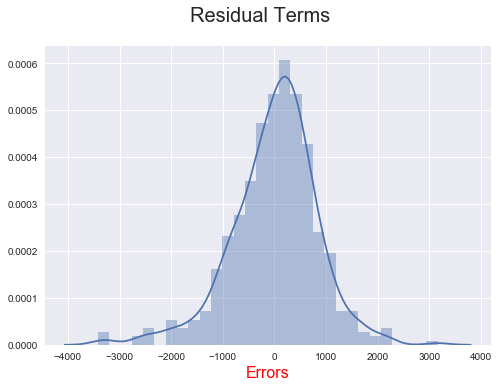

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Residual Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 16,c='r')   

###### From above residual plot its clear that error terms are following a normal distribution.

### Step-6 Prediction and Evaluation

### Evaluating model using test data

In [53]:
# Creating X_test_new dataframe by dropping variables from X_test
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

In [54]:
# Making predictions
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lm.predict(X_test_new)

In [55]:
# Evaluation of test via comparison of y_test_pred and y_test
from sklearn.metrics import r2_score 
r2_score(y_test, y_test_pred)

0.8275602199467644

Text(0, 0.5, 'y_test_pred')

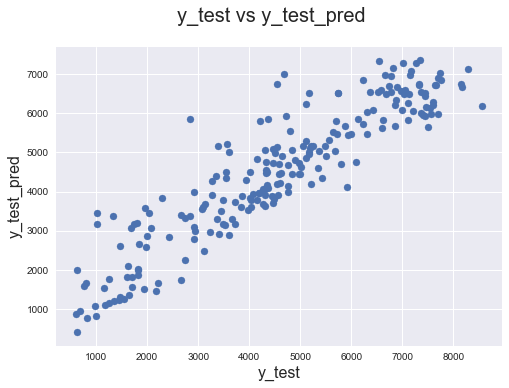

In [56]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=16)  
plt.ylabel('y_test_pred', fontsize=16)  

In [57]:
# Evaluation of the model using Statistics
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     291.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.60e-172
Time:                        22:09:09   Log-Likelihood:                -4164.4
No. Observations:                 511   AIC:                             8345.
Df Residuals:                     503   BIC:                             8379.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3298.3391    200.263     

##### After performing above steps we can conclude Model-9 as the final model, which fairs good for both training as well as test set.

R2_score Train:  0.80<br>
R2_score Test :  0.83

### Conclusion:

Using mixed approach we concluded that below are the variables which fair significant in predicting the demand for shared bikes:

1. Temprature
2. Humidity
3. Windspeed
4. Year
5. Season
    - Spring
6. Month
    - July
7. Weather Situation
    - Light rain/snow

### Significance of Variables:

Based on <b>Model_9</b> below is the final linear regression equation which we obtained:

<i><b>    cnt  =  {3298.3391 x Const} +{3732.0053 x temp} -{1551.2692 x hum} -{1323.8189 x windspeed} -{1289.5950 x spring} +{1938.3959 x yr(i.e. 2019)} -{799.0395 x jul} -{1270.9585 x Light Rain/Snow}
   </b></i>

##### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in 'temperature' is associated with an *increase of 3732.0053 in demand of shared bikes*.
- Holding all other features fixed, a 1 unit increase in 'humidity' is associated with a *decrease of 1551.27 in demand of shared bikes*.
- Holding all other features fixed, a 1 unit increase in 'windspeed' is associated with a *decrease of 1323.8189 in demand of shared bikes*.
- Holding all other features fixed, if its 'spring' season then there would be a *decrease in demand of shared bikes by 1289.60*.
- Holding all other features fixed, as years progress there would be an *increase in demand of shared bikes by 1938.40*.
- Holding all other features fixed, if its 'july' month then there would be a *decrease in demand of shared bikes by 799.04*.
- Holding all other features fixed, if its 'Lightly Rainy or Snowy' then there would be a *decrease in demand of shared bikes by 1270.95*.